<a href="https://colab.research.google.com/github/gav121/Bike-Sharing-Demand-prediction-capston-2/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

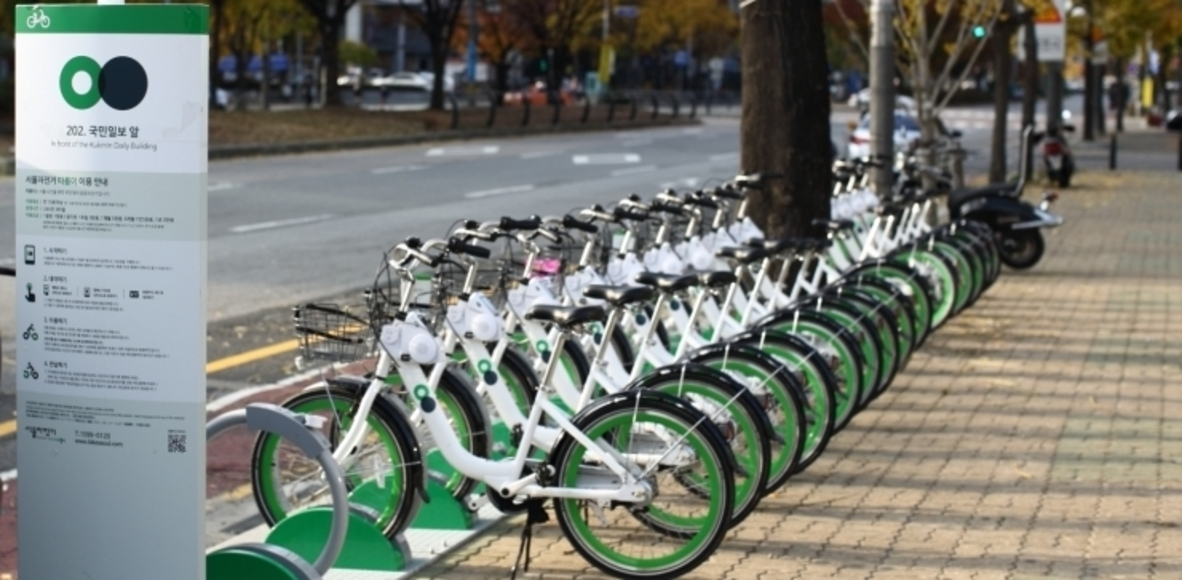


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


**IMPORTING DATASET AND MODULES**

In [ ]:
# first we import the modules for implementation
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import math

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google.colab import drive
bike_rent_df=pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv',encoding ='latin')


**DEEP DIVE INTO DATA**

In [ ]:
#lets see the no of rows and cols dataset contains
bike_rent_df.shape

(8760, 14)

* This dataset contains 8760 rows and 14 coloumns.

In [ ]:
#lets see top 10 rows of dataset with transpose
bike_rent_df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Date,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017
Rented Bike Count,254,204,173,107,78,100,181,460,930,490
Hour,0,1,2,3,4,5,6,7,8,9
Temperature(°C),-5.2,-5.5,-6.0,-6.2,-6.0,-6.4,-6.6,-7.4,-7.6,-6.5
Humidity(%),37,38,39,40,36,37,35,38,37,27
Wind speed (m/s),2.2,0.8,1.0,0.9,2.3,1.5,1.3,0.9,1.1,0.5
Visibility (10m),2000,2000,2000,2000,2000,2000,2000,2000,2000,1928
Dew point temperature(°C),-17.6,-17.6,-17.7,-17.6,-18.6,-18.7,-19.5,-19.3,-19.8,-22.4
Solar Radiation (MJ/m2),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.23
Rainfall(mm),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#lets see last 10 rows of dataset with transpose
bike_rent_df.tail(10).T

,8750,8751,8752,8753,8754,8755,8756,8757,8758,8759
Date,30/11/2018,30/11/2018,30/11/2018,30/11/2018,30/11/2018,30/11/2018,30/11/2018,30/11/2018,30/11/2018,30/11/2018
Rented Bike Count,761,768,837,1047,1384,1003,764,694,712,584
Hour,14,15,16,17,18,19,20,21,22,23
Temperature(°C),7.8,7.0,7.2,6.0,4.7,4.2,3.4,2.6,2.1,1.9
Humidity(%),20,20,23,29,34,34,37,39,41,43
Wind speed (m/s),2.2,3.3,1.5,2.1,1.9,2.6,2.3,0.3,1.0,1.3
Visibility (10m),2000,1994,1945,1877,1661,1894,2000,1968,1859,1909
Dew point temperature(°C),-13.8,-14.4,-12.6,-10.7,-9.8,-10.3,-9.9,-9.9,-9.8,-9.3
Solar Radiation (MJ/m2),1.67,1.21,0.72,0.23,0.0,0.0,0.0,0.0,0.0,0.0
Rainfall(mm),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#lets see colums of dataset 
print ("features of the dataset")
list(bike_rent_df.columns)

features of the dataset


['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

In [ ]:
#lets see the information of the dataset
bike_rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# unique values of every features 
bike_rent_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [ ]:
#lets see the description
bike_rent_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
"SO BY ABOVE IMPLEMENTATION WE GET TO KNOW THAT "
"OUR DATASET CONTAINS 8760 ROWS AND 14 COLUMS(FEATURES)"

'OUR DATASET CONTAINS 8760 ROWS AND 14 COLUMS(FEATURES)'

**UNDERSTANDING FEATURES OF THE DATASET**

**Date:** formating in dd/mm/yyyy str type we need to convert it into datetime format

**Rented Bike Count**: number of rented bikes(dependent var) per hour need to predict 

**Hour:** hour of the day starting from 0 to 24

**Temprature:**temprature in celsius

**Humidity:**humidity in air in percentage

**Wind speed:**speed of the wind in m/s

**Visibility:**its like vision distance in m

**Dew Point Temprature:**the temperature the air needs to be cooled

**Solar Radiation:**solar resource or sunlight

**Rainfall:**amount of rainfall in mm

**Snowfall:**amount snowing in cm

**Seasons:**season of the year

**Holiday:**Holiday or working day

**Functioning Day:** Working day or not

**CHECKING OUT THE MISSING VALUES**

In [ ]:
#MISSING VALUES IN THE FEATURES
bike_rent_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

SO HERE WE CAN SEE THAT THERE IS NO MISSING VALUES ARE PRESENT IN THE DATASET.

In [ ]:
# HERE WE ARE GOING TO CHANGE THE FORMAT OF DATE COLUMN FROM STRING TO DATETIME FORMAT.

bike_rent_df['Date'] = bike_rent_df['Date'].apply(lambda X:dt.datetime.strptime(X,"%d/%m/%Y"))

In [ ]:
bike_rent_df['year'] = bike_rent_df['Date'].dt.year
bike_rent_df['month'] = bike_rent_df['Date'].dt.month
bike_rent_df['day'] = bike_rent_df['Date'].dt.day_name()



*  So what we do above is that we convert our string date columns into 3 diffrent colums date,month,year.

* and we drop year column beacuse it contain details from 2017 dec to 2018 nov so by considering it as one year.



*  considering day column it show details for each day of month so we need weekend and weekdays so we drop that column also. 









In [ ]:
# creating weekday and weekend col and droping date, day, year col.
bike_rent_df['Week End Days']=bike_rent_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0)
bike_rent_df['Week Days']=bike_rent_df['day'].apply(lambda x : 0 if x=='Saturday' or x=='Sunday' else 1)
bike_rent_df=bike_rent_df.drop(columns=['Date','day','year'],axis=1)

In [ ]:
bike_rent_df.head().T

,0,1,2,3,4
Rented Bike Count,254,204,173,107,78
Hour,0,1,2,3,4
Temperature(°C),-5.2,-5.5,-6.0,-6.2,-6.0
Humidity(%),37,38,39,40,36
Wind speed (m/s),2.2,0.8,1.0,0.9,2.3
Visibility (10m),2000,2000,2000,2000,2000
Dew point temperature(°C),-17.6,-17.6,-17.7,-17.6,-18.6
Solar Radiation (MJ/m2),0.0,0.0,0.0,0.0,0.0
Rainfall(mm),0.0,0.0,0.0,0.0,0.0
Snowfall (cm),0.0,0.0,0.0,0.0,0.0


In [ ]:
bike_rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month                      8760 non-null   int64

In [ ]:
#changing data type of hour,month,Week End Days column from int to category datatype it helps further in analysis.

col=['Hour','month','Week End Days','Week Days']
for colum in col:
  bike_rent_df[colum]=bike_rent_df[colum].astype('category')

In [ ]:
print(bike_rent_df.value_counts('Week End Days'))
print(bike_rent_df.value_counts('Week Days'))

Week End Days
0    6264
1    2496
dtype: int64
Week Days
1    6264
0    2496
dtype: int64


HERE WE CAN SEE THAT OUR COLUMS DATA TYPE HAS CHANGED SUCCESFULLY!

**LET'S DO SOME DATA PROCESSING**

In [ ]:
bike_rent_df.value_counts('Functioning Day')

Functioning Day
Yes    8465
No      295
dtype: int64

As we know the bikes will be rented only on the working days we can drops the non working days also can remove the column forr the better fitment of of our model.

In [ ]:
bike_rent_df = bike_rent_df[bike_rent_df['Functioning Day'] == 'Yes']

In [ ]:
bike_rent_df=bike_rent_df.drop(columns=['Functioning Day'],axis=1)

In [ ]:
bike_rent_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8465 non-null   int64   
 1   Hour                       8465 non-null   category
 2   Temperature(°C)            8465 non-null   float64 
 3   Humidity(%)                8465 non-null   int64   
 4   Wind speed (m/s)           8465 non-null   float64 
 5   Visibility (10m)           8465 non-null   int64   
 6   Dew point temperature(°C)  8465 non-null   float64 
 7   Solar Radiation (MJ/m2)    8465 non-null   float64 
 8   Rainfall(mm)               8465 non-null   float64 
 9   Snowfall (cm)              8465 non-null   float64 
 10  Seasons                    8465 non-null   object  
 11  Holiday                    8465 non-null   object  
 12  month                      8465 non-null   category
 13  Week End Days              8465 n

**SO NOW FROM HERE OUR EDA(EXPLORATORY DATA ANALYSIS) STARTS**

[Text(0.5, 1.0, 'No of Bike Rent in Respective Month')]

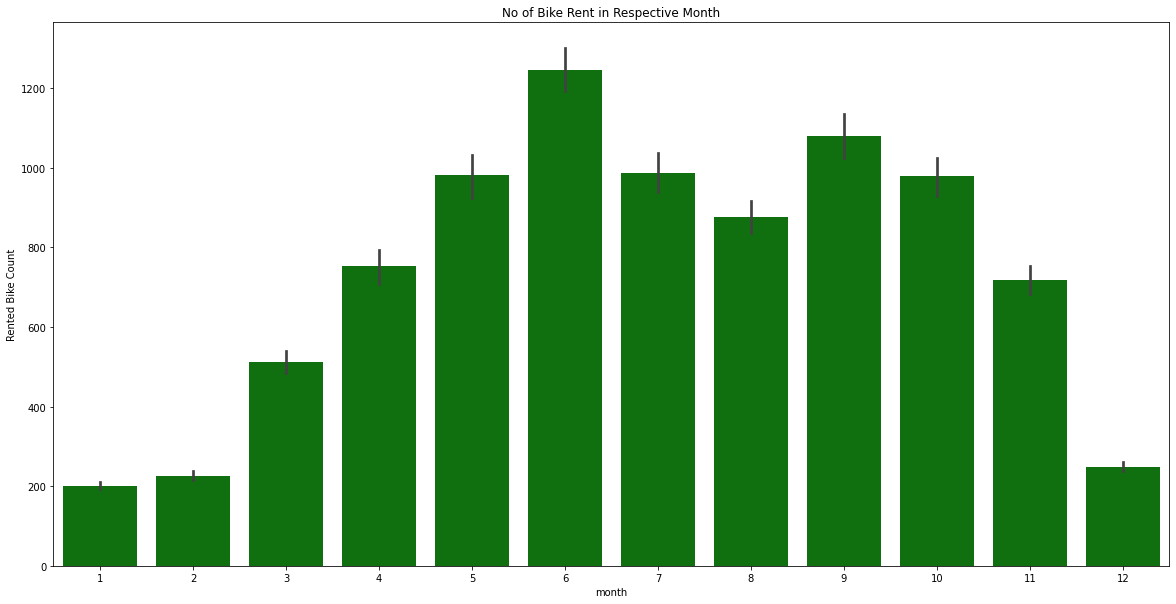

In [ ]:
# LETS PERFORM ANALYSIS ON MONTH VS RENTED BIKE 
fig,ax=plt.subplots(figsize=(20,10))
sns.barplot(data=bike_rent_df,x='month',y='Rented Bike Count',color="green")
ax.set(title='No of Bike Rent in Respective Month')



* NO. of Rented bike is very low in Jan,Feb and Dec.

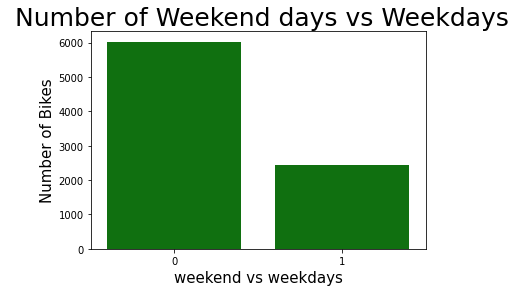

In [ ]:

sns.countplot(x = bike_rent_df['Week End Days'],color='green')
plt.rcParams['figure.figsize'] = (12,8)
plt.title(' Number of Weekend days vs Weekdays',fontsize=25)
plt.xlabel('weekend vs weekdays', fontsize=15)
plt.ylabel('Number of Bikes', fontsize=15)
plt.show()

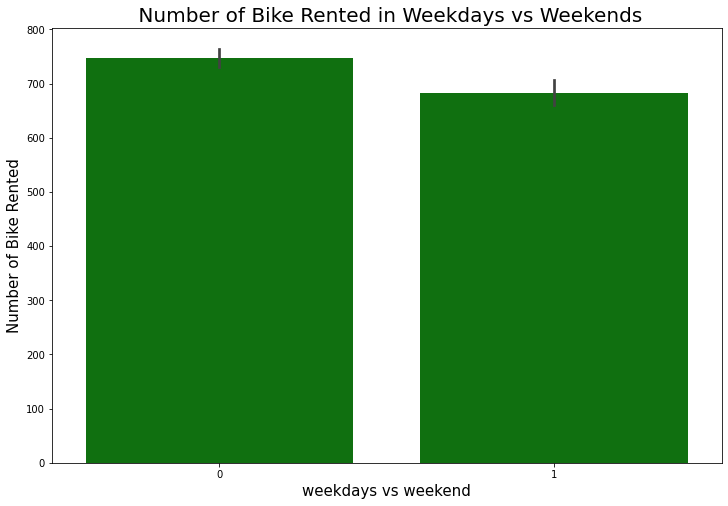

In [ ]:
# bike rented on weekday vs weekend


sns.barplot(x = bike_rent_df['Week End Days'],y = bike_rent_df['Rented Bike Count'],color='green')
plt.rcParams['figure.figsize'] = (12,10)
plt.title(' Number of Bike Rented in Weekdays vs Weekends',fontsize=20)
plt.xlabel('weekdays vs weekend', fontsize=15)
plt.ylabel('Number of Bike Rented', fontsize=15)
plt.show()



[Text(0.5, 1.0, ' Number of Bike Rented in Weekdays vs Weekends')]

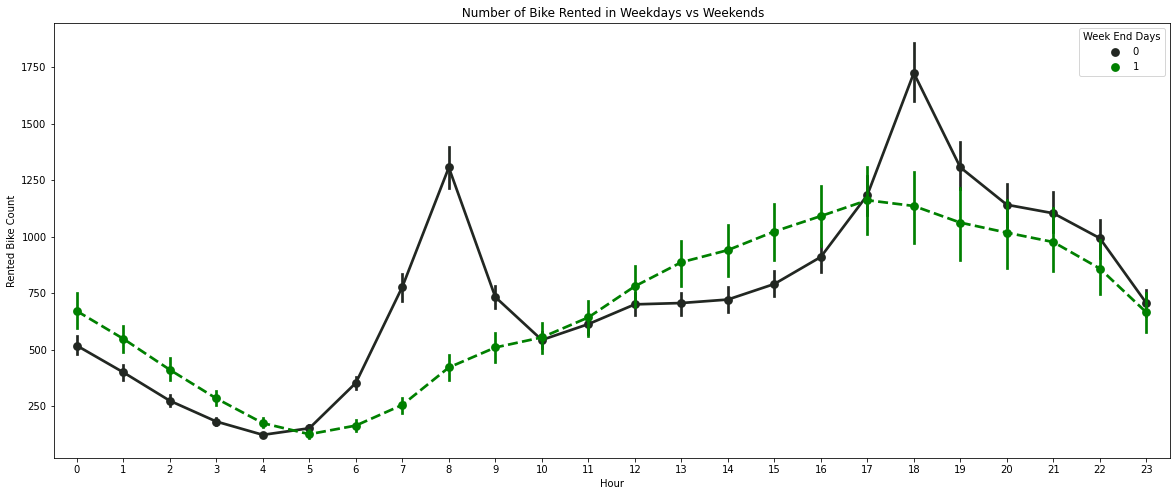

In [ ]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_rent_df,x='Hour',y='Rented Bike Count',hue='Week End Days',linestyles=["-", "--"],color='green')
sns.set_theme(style="darkgrid")
ax.set(title=' Number of Bike Rented in Weekdays vs Weekends')

***SO FROM THE ABOVE GRAPHS WE CAN SAY THAT IN WEEKDAYS BIKE DEMAND IS VERY HIGH WHEN COMPARIG IT TO THE WEEKENDS AND PEAK TIME OF BIKE BOOKING IS FROM 7 TO 9 AM AND 5 TO 7 PM***

[Text(0.5, 1.0, 'No of Bike Rent in Respective Hours')]

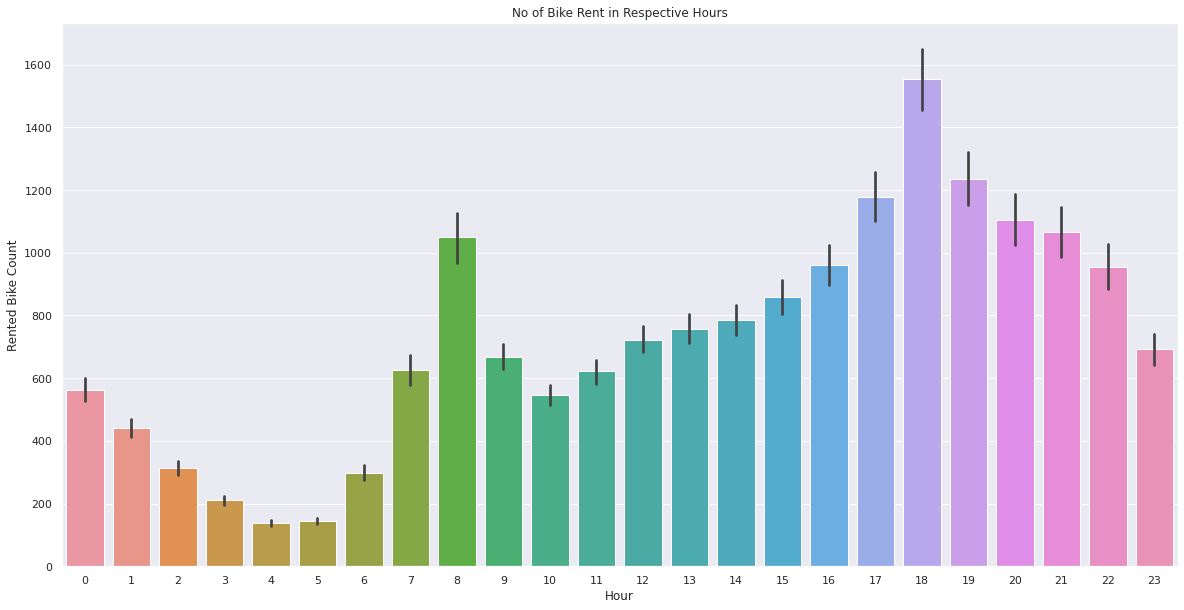

In [ ]:
# LETS PERFORM ANALYSIS ON HOUR VS RENTED BIKE 
fig,ax=plt.subplots(figsize=(20,10))
sns.barplot(data=bike_rent_df,x='Hour',y='Rented Bike Count')
ax.set(title='No of Bike Rent in Respective Hours')

***SO FROM THE ABOVE OBSERVATION WE CAN SAY THAT BOOKING OF BIKES GENERALLY INCREASES IN EVENING FROM 5 OR 6 UPTO 12 AM IN THE NIGHT***

[Text(0.5, 1.0, 'No of Bike Rent in Respective Seasons')]

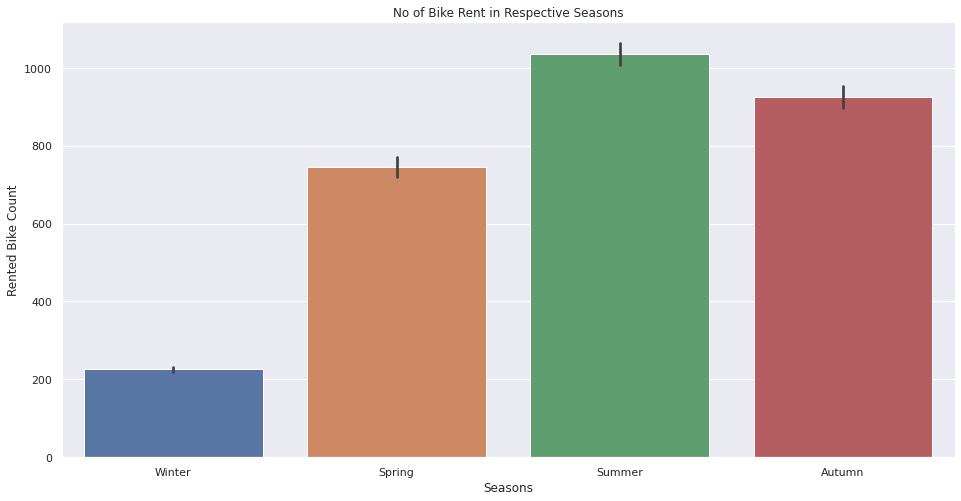

In [ ]:
# LETS PERFORM ANALYSIS ON SEASONS VS RENTED BIKE 
fig,ax=plt.subplots(figsize=(16,8))
sns.barplot(data=bike_rent_df,x='Seasons',y='Rented Bike Count')
ax.set(title='No of Bike Rent in Respective Seasons')

[Text(0.5, 1.0, 'No of Bike Rent in Respective Hours')]

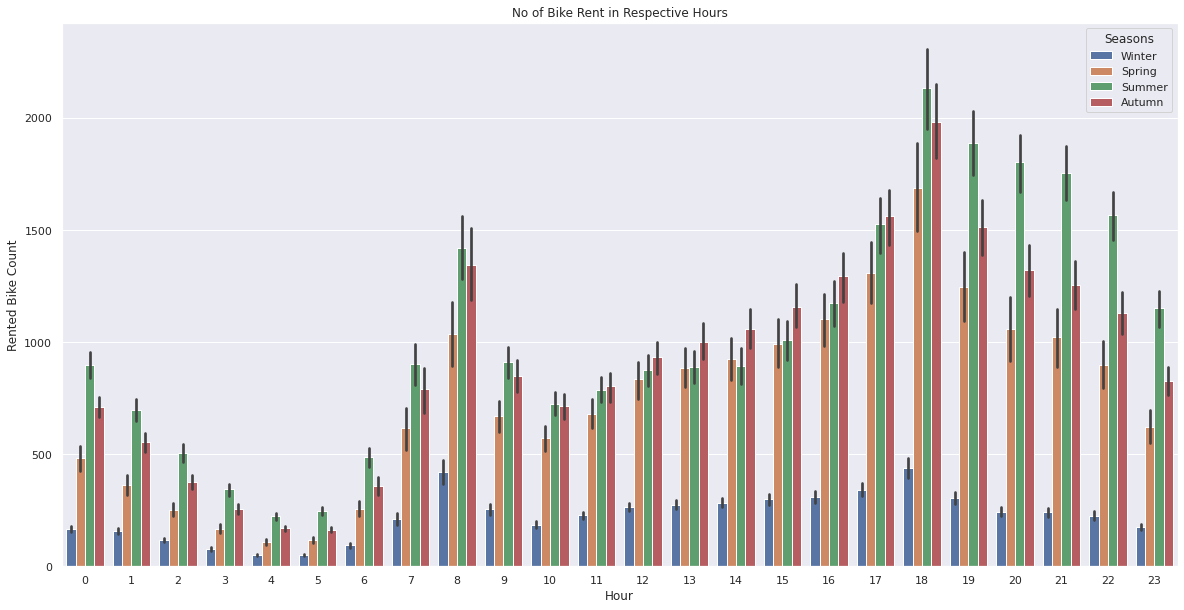

In [ ]:
fig,ax=plt.subplots(figsize=(20,10))
sns.barplot(data=bike_rent_df,x='Hour',y='Rented Bike Count',hue='Seasons')
ax.set(title='No of Bike Rent in Respective Hours')

***so from above observations we can say that like booking of bike is maximum in summer season and in winter season it is minimum so from this we can predict that company should go fro cars or other covered vehicles in winters to oncrease there growth in winters also.***

[Text(0.5, 1.0, 'No of Bike Rent in Respective Hours In Holidays')]

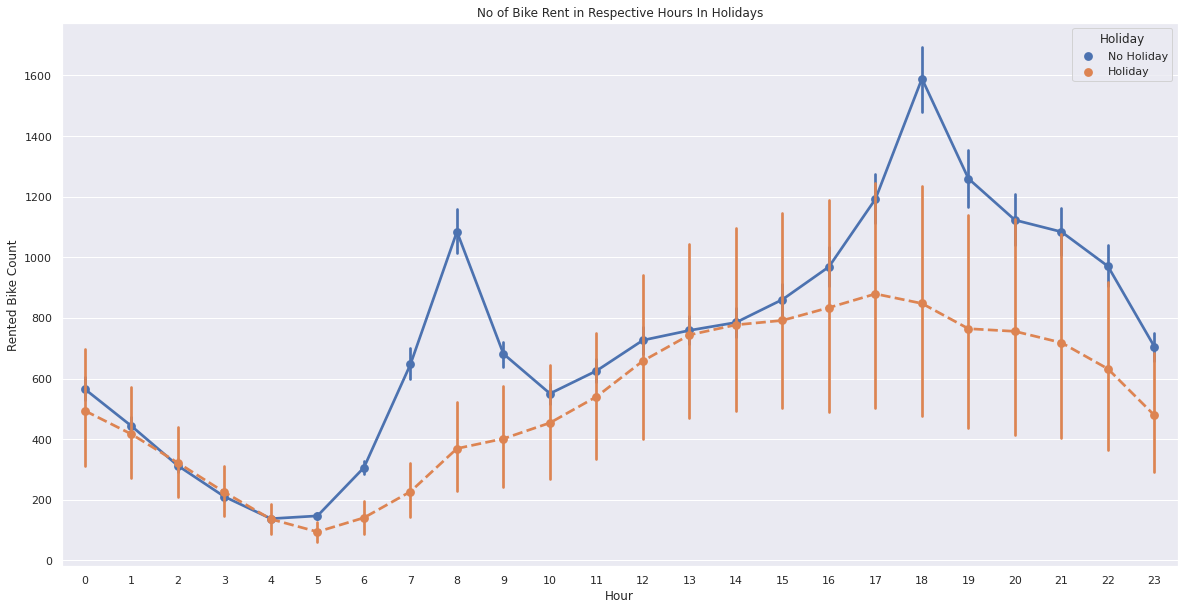

In [ ]:
# LETS PERFORM ANALYSIS ON HOUR VS RENTED BIKE vs HOLIDAY
fig,ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=bike_rent_df,hue='Holiday',x='Hour',y='Rented Bike Count',linestyles=["-", "--"])
sns.set_theme(style="darkgrid")
ax.set(title='No of Bike Rent in Respective Hours In Holidays')

**ANALYSIS ON NUMERICAL/QUANTITATIVE VARIABLES**

In [ ]:
# changing name of some numerical features
bike_rent_df=bike_rent_df.rename(columns={'Wind speed (m/s)':'Wind_speed',
                                          'Temperature(°C)':'Temprature',
                                          'Humidity(%)':'Humidity',
                                          'Visibility (10m)':'Visibility',
                                          'Snowfall (cm)':'Snowfall',
                                          'Rainfall(mm)':'Rainfall',
                                          'Dew point temperature(°C)':'Dew_point_temperature'})
                                 

In [ ]:
numericals = ['Wind_speed','Temprature','Humidity','Visibility','Snowfall','Rainfall','Dew_point_temperature']

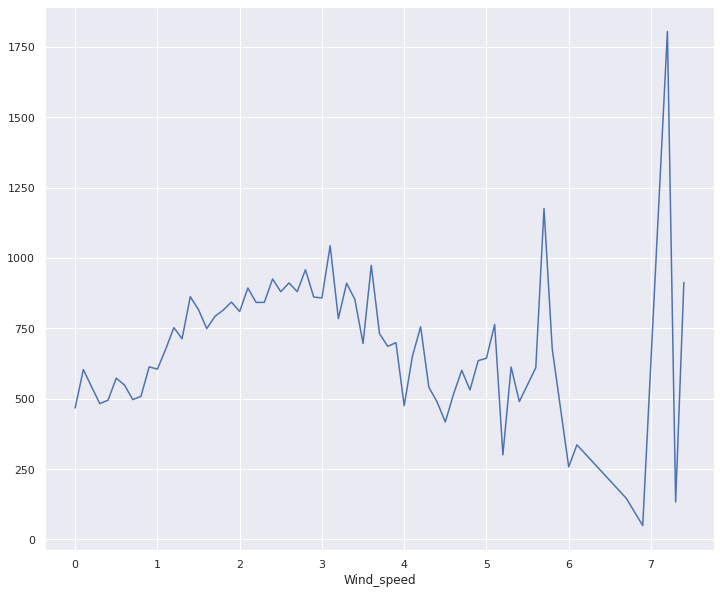

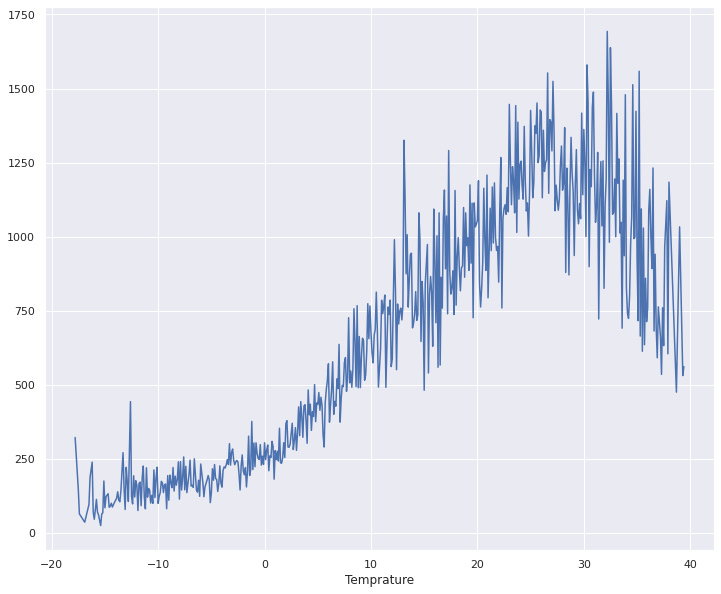

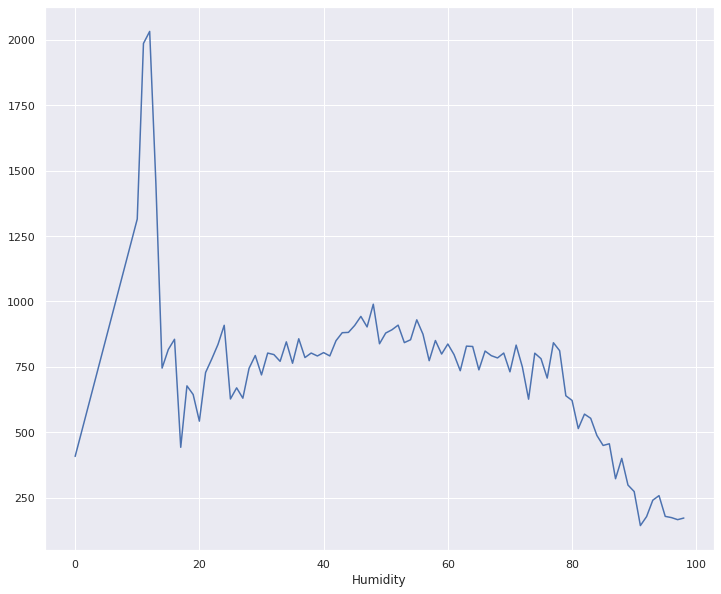

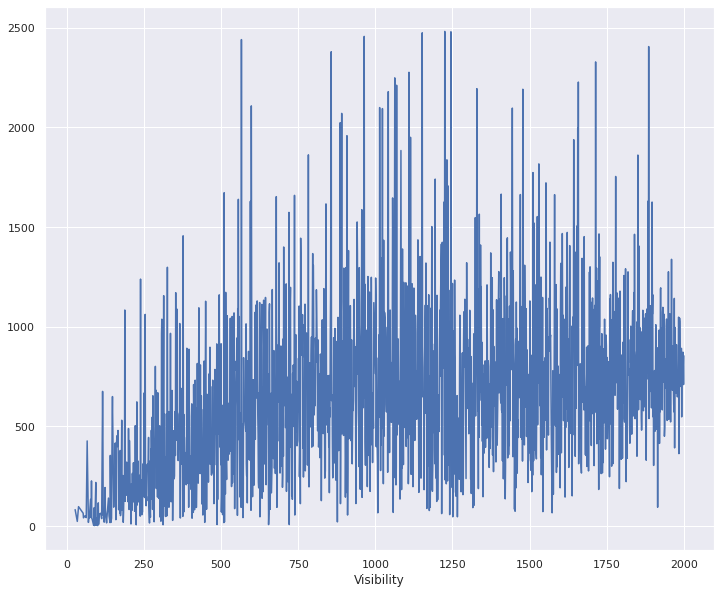

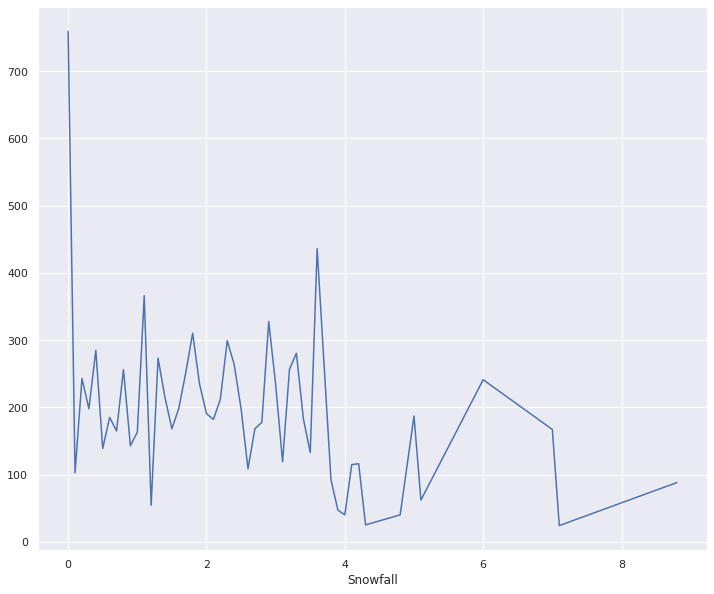

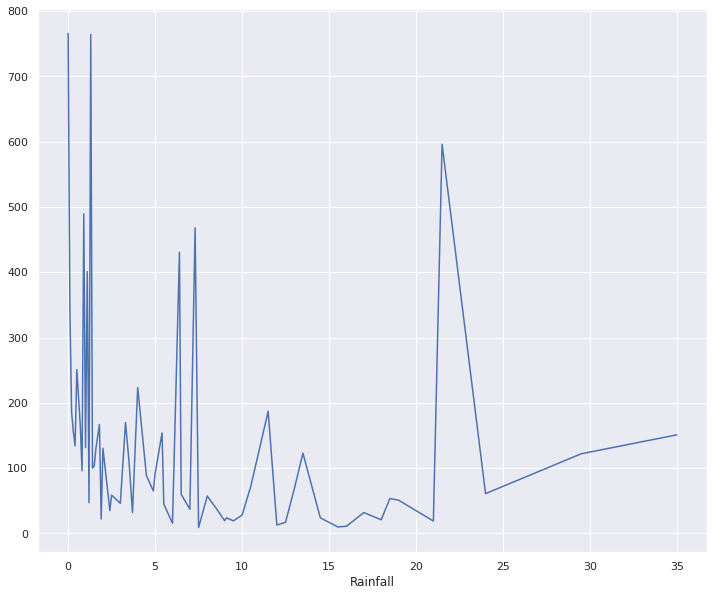

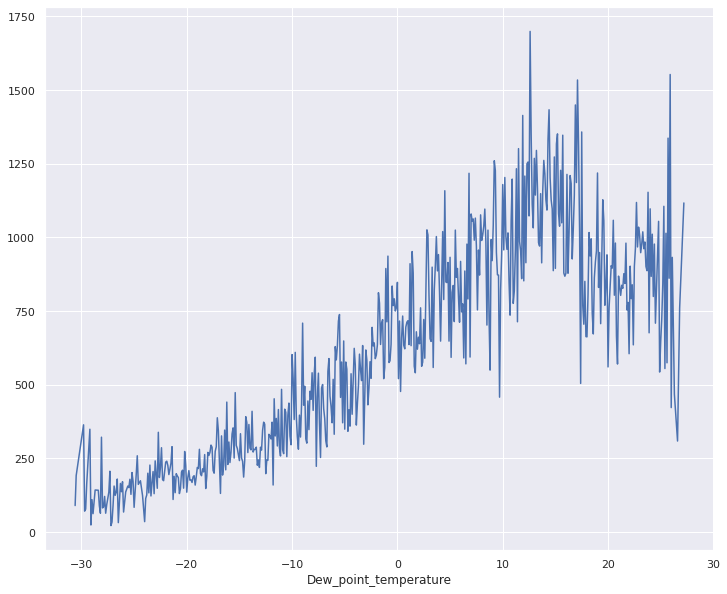

In [ ]:
for i in numericals:
  bike_rent_df.groupby(i).mean()['Rented Bike Count'].plot()
  plt.show()

**LETS UNDERSTAND FEATURES MORE PRECISELY BY USING REGRESSION PLOT**

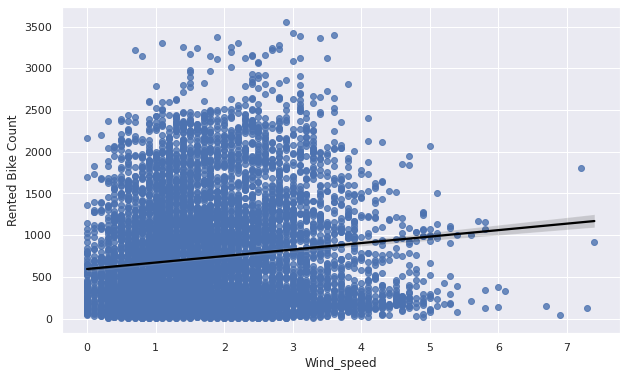

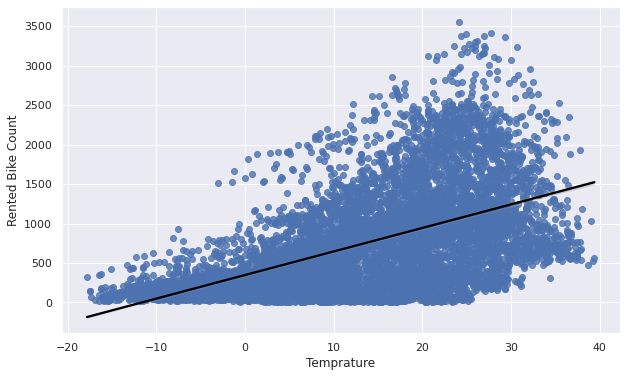

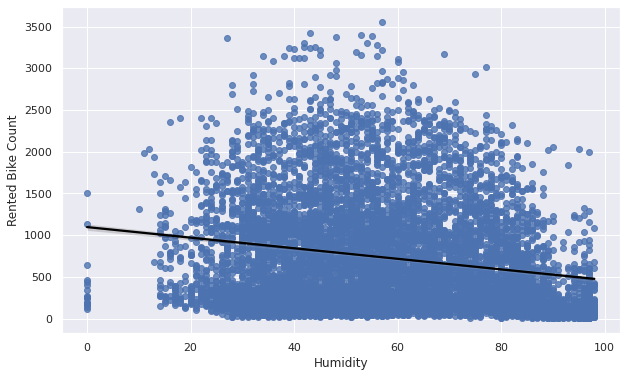

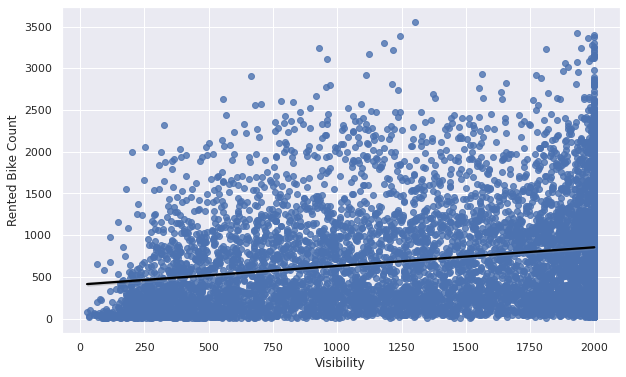

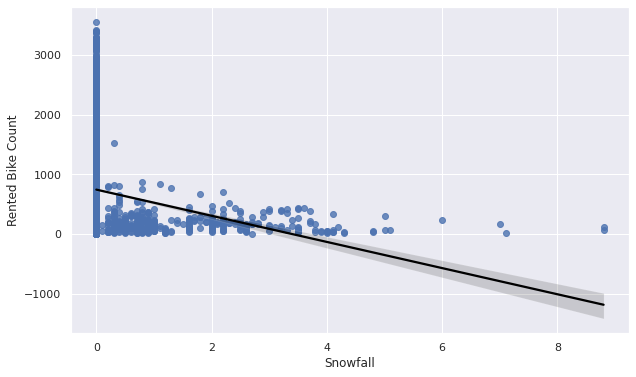

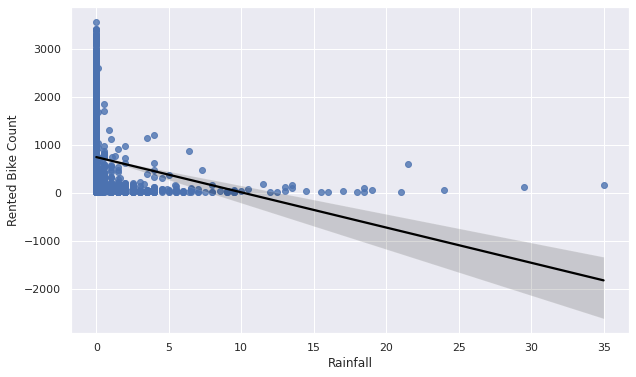

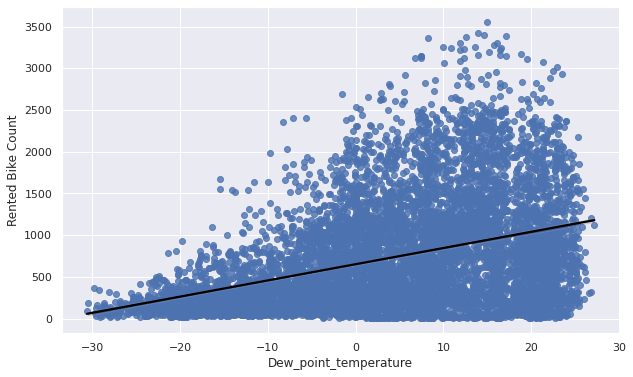

In [ ]:
#seeing how feature are correlated to each other
for i in numericals:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=bike_rent_df[i],y=bike_rent_df['Rented Bike Count'], line_kws={"color": "black"})

In [ ]:
#ASSIGN VARIBLE TO NUM COLUMN
num_var=list(bike_rent_df.columns)
num_feature=pd.Index(num_var)
num_feature

Index(['Rented Bike Count', 'Hour', 'Temprature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar Radiation (MJ/m2)',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'month', 'Week End Days',
       'Week Days'],
      dtype='object')

<Figure size 1080x576 with 0 Axes>

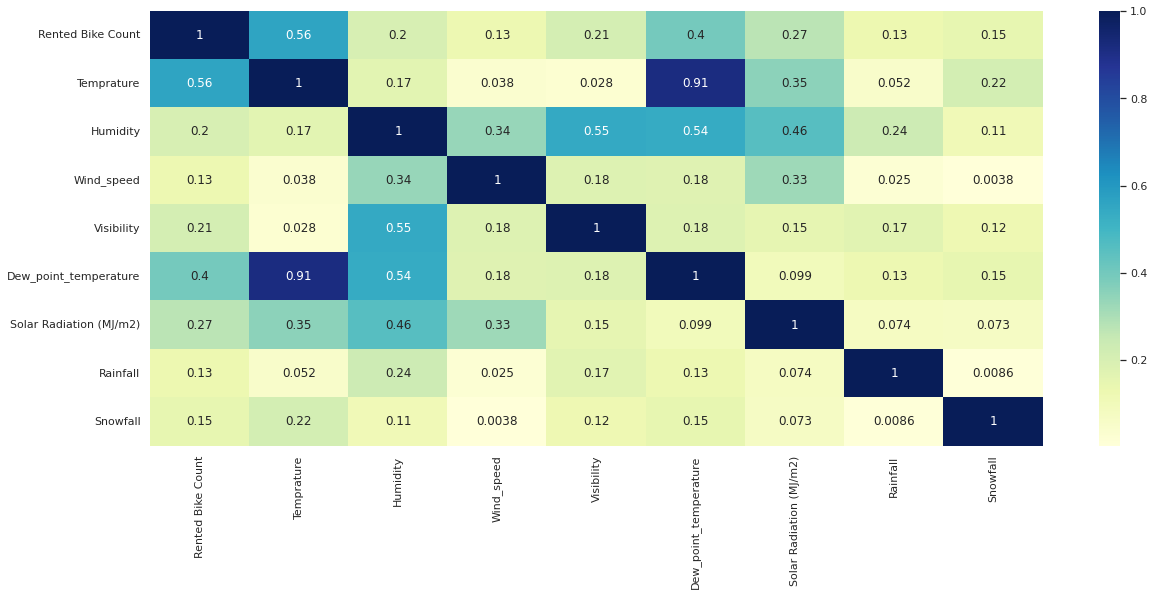

In [ ]:
# plotting the correlation heatmap graph
plt.figure(figsize=(15,8))
plt.figure(figsize=(20,8))
correlation = bike_rent_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap="YlGnBu")

Here we can easily see that there is almost 91% relation between temperature and dew point temperature. Hence to remove multicolinnerity we can add both the features.

In [ ]:
# creating new feature from temperature and dew point temperature as they both are related to each other.
bike_rent_df['Temperature_and_dew_temp'] = bike_rent_df['Temprature'] + bike_rent_df['Dew_point_temperature']
# Dropping temperature and dew point temperature columns as we merged these 2 features to make a single feature to remove multicollinearity
bike_rent_df.drop(['Temprature', 'Dew_point_temperature'], axis =1, inplace = True)
bike_rent_df.head()

,Rented Bike Count,Hour,Humidity,Wind_speed,Visibility,Solar Radiation (MJ/m2),Rainfall,Snowfall,Seasons,Holiday,month,Week End Days,Week Days,Temperature_and_dew_temp
0,254,0,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,12,0,1,-22.8
1,204,1,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,12,0,1,-23.1
2,173,2,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,12,0,1,-23.7
3,107,3,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,12,0,1,-23.8
4,78,4,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,12,0,1,-24.6


* We can find that the following features are positively correlated with target variable temperature and dew point temperature , solar radiation.
* The following features are negatively correlated with target variable rainfall, snowfall. 

In [ ]:
# One hot encoding the season variable
bike_data =pd.get_dummies(bike_rent_df,columns=['Hour', 'Seasons', 'Holiday', 'month'])
bike_data.head()

,Rented Bike Count,Humidity,Wind_speed,Visibility,Solar Radiation (MJ/m2),Rainfall,Snowfall,Week End Days,Week Days,Temperature_and_dew_temp,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,254,37,2.2,2000,0.0,0.0,0.0,0,1,-22.8,...,0,0,0,0,0,0,0,0,0,1
1,204,38,0.8,2000,0.0,0.0,0.0,0,1,-23.1,...,0,0,0,0,0,0,0,0,0,1
2,173,39,1.0,2000,0.0,0.0,0.0,0,1,-23.7,...,0,0,0,0,0,0,0,0,0,1
3,107,40,0.9,2000,0.0,0.0,0.0,0,1,-23.8,...,0,0,0,0,0,0,0,0,0,1
4,78,36,2.3,2000,0.0,0.0,0.0,0,1,-24.6,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#Assign the value in X and Y
Y = bike_data['Rented Bike Count']
X = bike_data.drop(columns=['Rented Bike Count'], axis=1)

TRAIN TEST SPLIT

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=10)
print(X_train.shape)
print(X_test.shape)

# standardizing the independent variables
from sklearn.preprocessing import MaxAbsScaler

scaler =MaxAbsScaler()
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

(6772, 51)
(1693, 51)


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
#import the packages
from sklearn.linear_model import LinearRegression
#Fitting the model and printing y_pred
Lr= LinearRegression()
Lr.fit(X_train, Y_train)
y_pred_test_Lr=Lr.predict(X_test)
#calculating Mean Squared Error(MSE)
MSE_Lr= mean_squared_error(Y_test, y_pred_test_Lr)
print("MSE :",MSE_Lr)

#calculating Root Mean Squared Error(RMSE)
RMSE_Lr=np.sqrt(MSE_Lr)
print("RMSE :",MSE_Lr)

#calculating Mean Absolute Error(MAE)
MAE_Lr= mean_absolute_error(Y_test, y_pred_test_Lr)
print("MAE :",MAE_Lr)

#calculating r2
R2_Lr= r2_score((Y_test), (y_pred_test_Lr))
print("R2 :",R2_Lr)

print("Adjusted R2 : ",1-(1-r2_score(Y_test,y_pred_test_Lr))*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

MSE : 123688.20499160145
RMSE : 123688.20499160145
MAE : 266.2024881866509
R2 : 0.713929384414175
Adjusted R2 :  0.7050387071473394


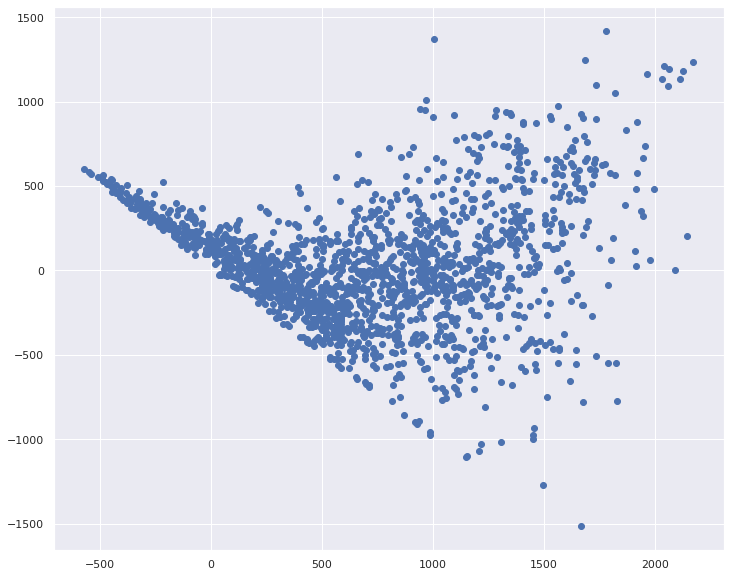

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_Lr),(Y_test)-(y_pred_test_Lr))

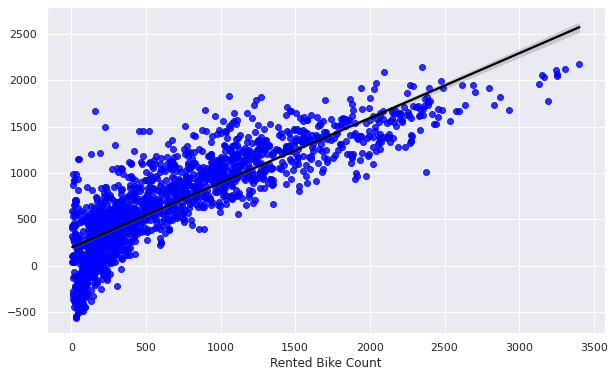

In [ ]:
fig,ax=plt.subplots(figsize=(10,6))
sns.regplot(x=Y_test,y=y_pred_test_Lr,scatter_kws={"color": 'blue'}, line_kws={"color": "black"})

**LASSO REGRESSION**

In [ ]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
#Fitting the model and printing y_pred
lasso.fit(X_train, Y_train)
y_pred_test_lasso=lasso.predict(X_test)
#calculating Mean Squared Error(MSE)
MSE_lasso= mean_squared_error(Y_test, y_pred_test_lasso)
print("MSE :",MSE_lasso)

#calculating Root Mean Squared Error(RMSE)
RMSE_lasso=np.sqrt(MSE_lasso)
print("RMSE :",RMSE_lasso)

#calculating Mean Absolute Error(MAE)
MAE_lasso= mean_absolute_error(Y_test, y_pred_test_lasso)
print("MAE :",MAE_lasso)

#calculating r2
R2_lasso= r2_score((Y_test), (y_pred_test_lasso))
print("R2 :",R2_lasso)

print("Adjusted R2 : ",1-(1-r2_score(Y_test,y_pred_test_lasso))*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

MSE : 126977.54006523405
RMSE : 356.3390801823932
MAE : 268.42480406043046
R2 : 0.7063216896509918
Adjusted R2 :  0.6971945758010227


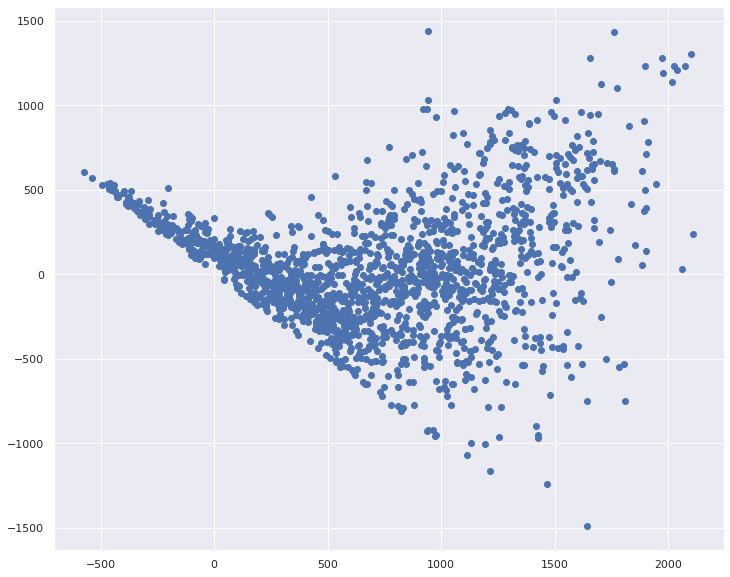

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_lasso),(Y_test)-(y_pred_test_lasso))

**RIDGE REGRESSION**

In [ ]:
#import the packages
from sklearn.linear_model import Ridge
ridge= Ridge(alpha=0.1)
#Fitting the model and printing y_pred
ridge.fit(X_train,Y_train)
y_pred_test_ridge=ridge.predict(X_test)
#calculating Mean Squared Error(MSE)
MSE_ridge= mean_squared_error(Y_test, y_pred_test_ridge)
print("MSE :",MSE_ridge)

#calculating Root Mean Squared Error(RMSE)
RMSE_ridge=np.sqrt(MSE_ridge)
print("RMSE :",RMSE_ridge)

#calculating Mean Absolute Error(MAE)
MAE_ridge= mean_absolute_error(Y_test, y_pred_test_ridge)
print("MAE :",MAE_ridge)

#calculating r2
R2_ridge= r2_score((Y_test), (y_pred_test_ridge))
print("R2 :",R2_ridge)

print("Adjusted R2 : ",1-(1-r2_score(Y_test,y_pred_test_ridge))*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

MSE : 123730.48290489083
RMSE : 351.7534405018533
MAE : 266.21508579231676
R2 : 0.7138316025061814
Adjusted R2 :  0.7049378863135033


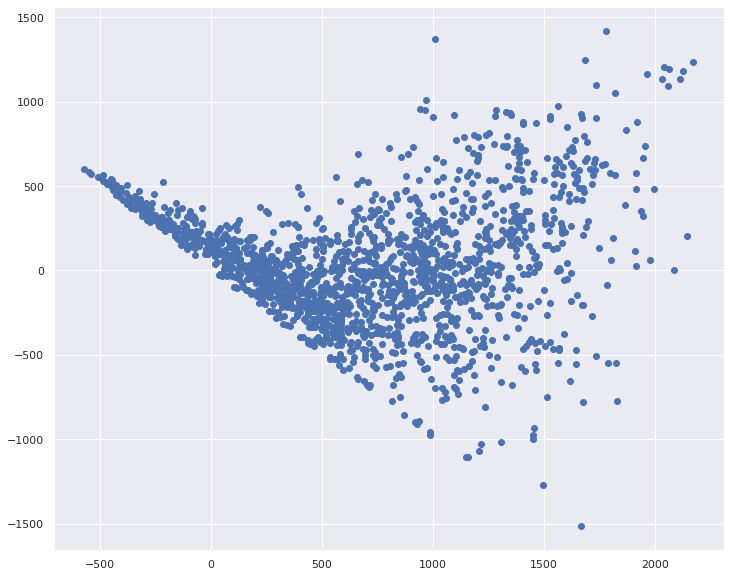

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_ridge),(Y_test)-(y_pred_test_ridge))

**DECISION TREE**

In [ ]:
#import the packages
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
#Fitting the model and printing y_pred
decision_regressor.fit(X_train, Y_train)
y_pred_test_DT = decision_regressor.predict(X_test)
#calculating Mean Squared Error(MSE)
MSE_DT= mean_squared_error(Y_test, y_pred_test_DT)
print("MSE :",MSE_DT)

#calculating Root Mean Squared Error(RMSE)
RMSE_DT=np.sqrt(MSE_DT)
print("RMSE :",RMSE_DT)

#calculating Mean Absolute Error(MAE)
MAE_DT= mean_absolute_error(Y_test, y_pred_test_DT)
print("MAE :",MAE_DT)

#calculating r2
R2_DT= r2_score((Y_test), (y_pred_test_DT))
print("R2 :",R2_DT)

print("Adjusted R2 : ",1-(1-r2_score(Y_test,y_pred_test_DT))*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

MSE : 186929.3273921784
RMSE : 432.35324376275753
MAE : 287.7744006352708
R2 : 0.56766299776316
Adjusted R2 :  0.5542265644212472


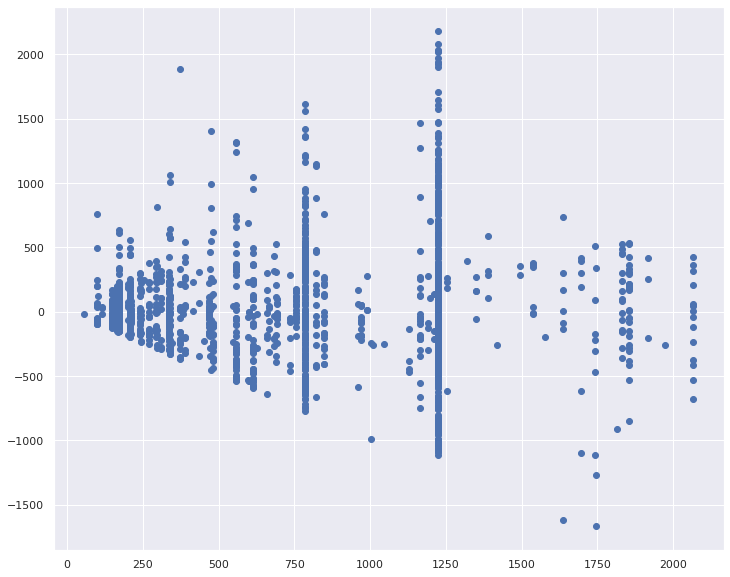

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_DT),(Y_test)-(y_pred_test_DT))

RAMDOM FOREST

In [ ]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()
#Fitting the model and printing y_pred
rf_model.fit(X_train,Y_train)
y_pred_test_rf = rf_model.predict(X_test)
#calculating Mean Squared Error(MSE)
MSE_RF= mean_squared_error(Y_test, y_pred_test_rf)
print("MSE :",MSE_RF)

#calculating Root Mean Squared Error(RMSE)
RMSE_RF=np.sqrt(MSE_RF)
print("RMSE :",RMSE_RF)

#calculating Mean Absolute Error(MAE)
MAE_RF= mean_absolute_error(Y_test, y_pred_test_rf)
print("MAE :",MAE_RF)

#calculating r2
R2_RF= r2_score((Y_test), (y_pred_test_rf))
print("R2 :",R2_RF)

print("Adjusted R2 : ",1-(1-r2_score(Y_test,y_pred_test_rf))*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

MSE : 38775.705786001185
RMSE : 196.91547878722278
MAE : 116.59083874778499
R2 : 0.9103181259302017
Adjusted R2 :  0.907530937887813


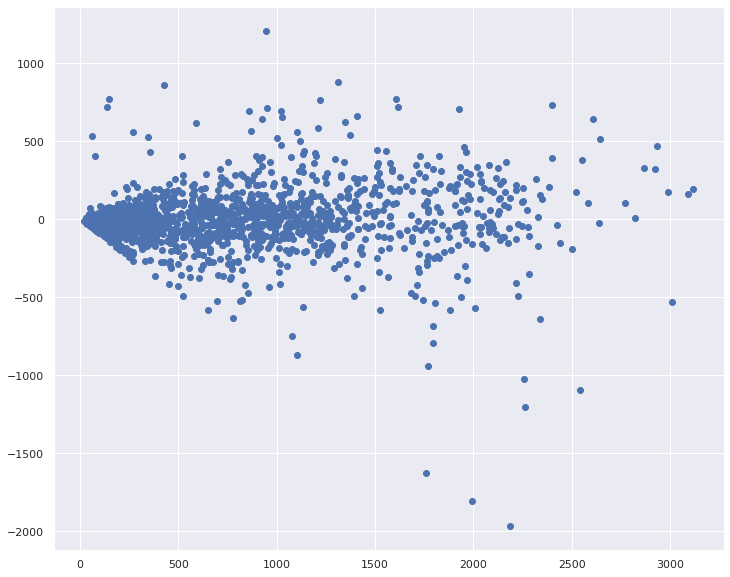

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_rf),(Y_test)-(y_pred_test_rf))

RANDOM FOREST WITH TUNING

In [ ]:
para_grids = {
            "n_estimators" : [10,50,100],
            "max_features" : ["auto", "log2", "sqrt"],
            "bootstrap"    : [True, False]
        }

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(rf_model, para_grids)
grid.fit(X_train,Y_train)
forest = grid.best_estimator_

reg_prediction=forest.predict(X_test)

print(grid.best_score_, grid.best_params_)

#calculating Mean Squared Error(MSE)
MSE_rf= mean_squared_error(Y_test, reg_prediction)
print("MSE :",MSE_rf)

#calculating Root Mean Squared Error(RMSE)
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)

#calculating Mean Absolute Error(MAE)
MAE_rf= mean_absolute_error(Y_test, reg_prediction)
print("MAE :",MAE_rf)

#calculating r2
R2_rf= r2_score((Y_test), (reg_prediction))
print("R2 :",R2_rf)

print("Adjusted R2 : ",1-(1-r2_score(Y_test,reg_prediction))*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

0.9032742923815217 {'bootstrap': False, 'max_features': 'sqrt', 'n_estimators': 100}
MSE : 34649.2364342551
RMSE : 186.14305368252423
MAE : 119.51186144629145
R2 : 0.9198619755456942
Adjusted R2 :  0.9173713970891618


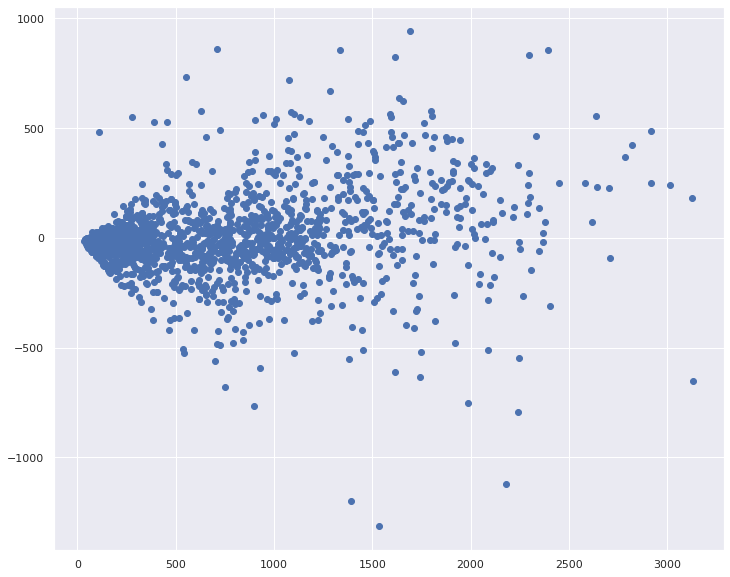

In [ ]:
### Heteroscadacity
plt.scatter((reg_prediction),(Y_test)-(reg_prediction))

GRADIENT BOOSTING

In [ ]:
#import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()
#Fitting the model and printing y_pred
gb_model.fit(X_train,Y_train)
y_pred_test_gb = gb_model.predict(X_test)
#calculating Mean Squared Error(MSE)
MSE_GB= mean_squared_error(Y_test, y_pred_test_gb)
print("MSE :",MSE_GB)

#calculating Root Mean Squared Error(RMSE)
RMSE_GB=np.sqrt(MSE_GB)
print("RMSE :",RMSE_GB)

#calculating Mean Absolute Error(MAE)
MAE_GB= mean_absolute_error(Y_test, y_pred_test_gb)
print("MAE :",MAE_GB)

#calculating r2
R2_GB= r2_score((Y_test), (y_pred_test_gb))
print("R2 :",R2_GB)

print("Adjusted R2 : ",1-(1-r2_score(Y_test,y_pred_test_gb))*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

MSE : 67560.13081556106
RMSE : 259.92331718328205
MAE : 185.08765974269116
R2 : 0.8437444523285083
Adjusted R2 :  0.838888247007822


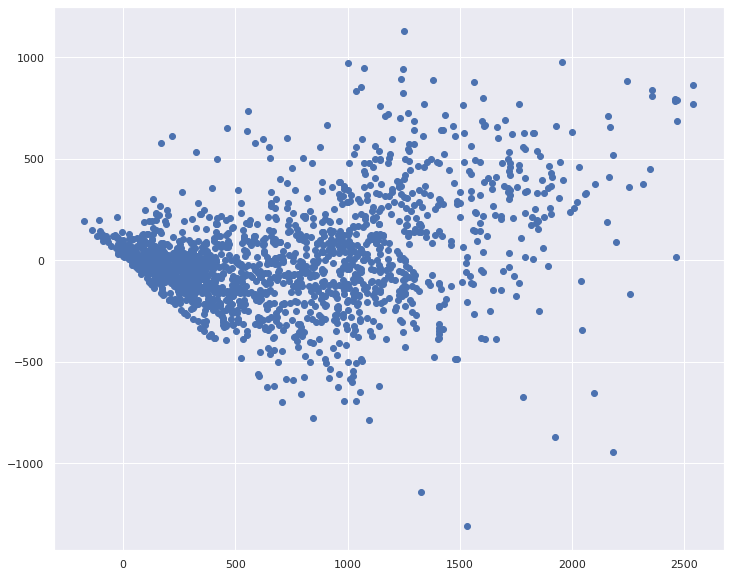

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_gb),(Y_test)-(y_pred_test_gb))

GRADIENT BOOSTING WITH TUNING

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

Grid = GridSearchCV(gb_model, param_dict)
Grid.fit(X_train,Y_train)
boosting = grid.best_estimator_

regg_prediction=boosting.predict(X_test)

print(Grid.best_score_, Grid.best_params_)

#calculating Mean Squared Error(MSE)
MSE_gb= mean_squared_error(Y_test, regg_prediction)
print("MSE :",MSE_gb)

#calculating Root Mean Squared Error(RMSE)
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)

#calculating Mean Absolute Error(MAE)
MAE_gb= mean_absolute_error(Y_test, regg_prediction)
print("MAE :",MAE_gb)

#calculating r2
R2_gb= r2_score((Y_test), (regg_prediction))
print("R2 :",R2_gb)

print("Adjusted R2 : ",1-(1-r2_score(Y_test,regg_prediction))*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

0.9080675066813905 {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 100}
MSE : 35167.1231550059
RMSE : 187.5289928384566
MAE : 119.786819255759
R2 : 0.9186641881494022
Adjusted R2 :  0.9161363841247949


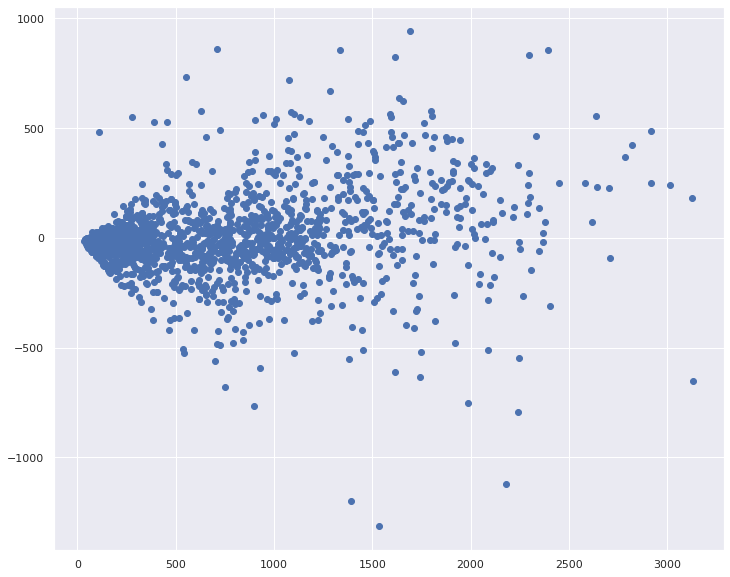

In [ ]:
### Heteroscadacity
plt.scatter((regg_prediction),(Y_test)-(regg_prediction))

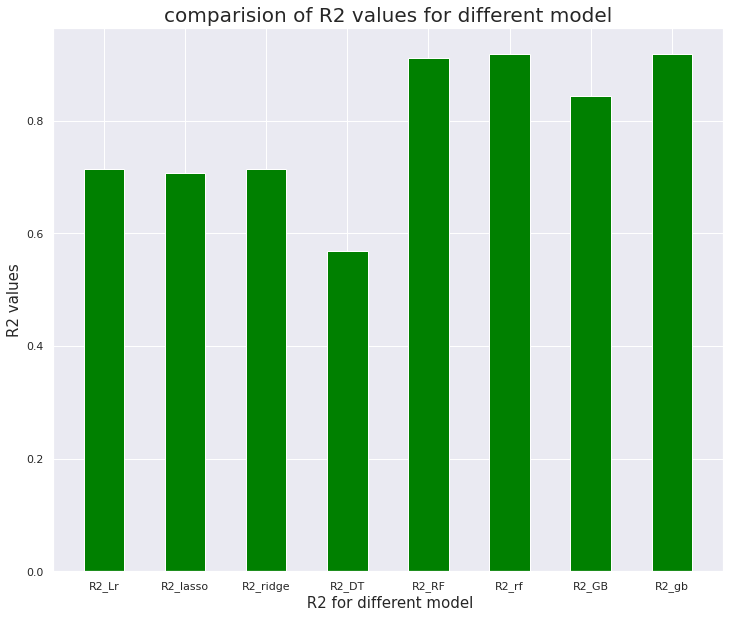

In [ ]:
# comparision of R2 values for different model
R2_all_x = ['R2_Lr','R2_lasso','R2_ridge','R2_DT','R2_RF','R2_rf','R2_GB','R2_gb']
R2_all_values = [R2_Lr,R2_lasso,R2_ridge,R2_DT,R2_RF,R2_rf,R2_GB,R2_gb]
plt.bar(R2_all_x,R2_all_values,color='green',width = 0.5)
plt.xlabel(" R2 for different model",size = 15)
plt.ylabel("R2 values",size = 15)
plt.title("comparision of R2 values for different model",size = 20)
plt.show()



CONCLUSION

During the time of our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable, 'Rented Bike Count' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class, we also analysed numerical variable, found out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features who had mostly 0 values and hot encoded the categorical variables.

Next we implemented 6 machine learning algorithms Linear Regression,lasso,ridge,decission tree, Random Forest and XGBoost. We did hyperparameter tuning to improve our model performance. The results of our evaluation are:

• No overfitting is seen.

• Random forest Regressor and Gradient Boosting gives the highest R2 score of 91% and 85% recpectively. We further get a model by the hyper parameter tuning of the both.

• We can deploy this model.

However, this is not the ultimate end. As this data is time dependent, the values for variables like temperature, windspeed, solar radiation etc., will not always be consistent. Therefore, there will be scenarios where the model might not perform well. As Machine learning is an exponentially evolving field, we will have to be prepared for all contingencies and also keep checking our model from time to time. Therefore, having a quality knowledge and keeping pace with the ever evolving ML field would surely help one to stay a step ahead in future.